In [48]:
#your name and matrikelnr
import pylab as pl
import scipy as sp
import time
import pdb
%matplotlib inline 



In [49]:
def generate_data(N):
    '''
    Generate N data points form a 2D Gaussian Gaussian distribution 
    with mean [1, 2] 
    
    Usage:     x = generate_data(N)
               
    Returns:   x : a 2xN array    
    
    Instructions: Use sp.random.multivariate_normal
    '''
    # Your code here 
    mean = [1, 2]
    cov = [[1, 0.5], [0.5, 1]]
    return sp.random.multivariate_normal(mean, cov, N).T

  


In [50]:
import numpy as np
mean = [1, 2]
cov = [[1, 0], [0, 100]]
#print(np.random.multivariate_normal(mean, cov, 2).T)
print()
print([l for l in sp.random.multivariate_normal(mean, cov, 2).T[0]])
generate_data(10)

()
[2.2851858765423576, 2.2237447845812541]


array([[-0.45520133,  1.19397107,  1.158391  ,  0.56325708,  0.94278729,
         2.10745417,  0.76180018,  1.4547433 ,  1.34538887,  3.19299696],
       [-0.16463154,  0.87247135,  2.10455295,  1.89774695,  2.69438137,
         1.89326358,  2.33417987,  2.83983366,  1.82656373,  4.05325338]])

In [51]:
def scale_data(X):
    '''
    Scales the data in X by 2 in x-direction and by 0.5 in y-direction
    
    Usage:     Y = scale_data(X)
    Input:     X : a 2xN array 
    Returns:   Y : a 2xN array of scaled data
    
    '''
    # Your code here 
    return [[2*i for i in X[0]],[.5*i for i in X[1]]]
  

In [52]:
def standardise_data(X):
    ''' Returns a centered, scaled version of X, the same size as X.
    
    Usage:      Y = standardise_data(X)
    Input:      X : a DxN array 
    Returns:    Y : a DxN array of z-scores of X
                    Y[i][n] = (X[i][n] - mean(X[i][:]))/std(X[i][:])
    
    Instructions: Do not use for-loops. Use sp.mean and sp.std
    '''
    # Your code here 
    
#    means = [1.*sum(x)/len(x) for x in X ]
    means2 = sp.mean(X, axis = 1, keepdims=True)
    squares2 = sp.std(X, axis = 1, keepdims=True)
    result = (X-means2)/squares2
#    print means2.shape
#    print X-means2
#    print sp.all(means == means2)
#    means = [sp.mean(x) for x in X ]
#    means = []
#    squares = [(sum([(i-y)**2 for i in x]) / len(x)) **.5 for (x,y) in zip(X,means)]
    squares2 = sp.std(X, axis = 1, keepdims=True)
    result = (X-means2)/squares2
#    print sp.all(squares == squares2)
    # squares = [(sum([(i-y)**2 for i in x]) / len(x)) **.5 for (x,y) in zip(X,means)]
    #  result = (X - mean)
 #   [[(y-m)/s for y in x] for ((x,m),s) in zip(zip(X,means),squares)] ==

#    print result == [[(y-m)/s for y in x] for ((x,m),s) in zip(zip(X,means),squares)]
#    return [[(y-m)/s for y in x] for ((x,m),s) in zip(zip(X,means),squares)]
    return result


In [53]:
a = generate_data(2)
print(a)
standardise_data(a)



[[ 0.80488417  0.20508574]
 [-0.42356202  0.97704618]]


array([[ 1., -1.],
       [-1.,  1.]])

2


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


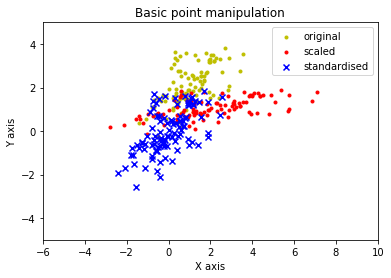

In [54]:

''' ---- Task 1 ---- '''

def task1():
    ''' 
    Task 1
    Generate, transform and plot gaussian data
    '''
    X = generate_data(100)
    X2 = scale_data(X)
    X3 = standardise_data(X) 
    print len(X)
    # Plot data 
    # Your code here 
    # Hint: Use the functions pl.scatter(x[0,:],[1,:],c='r'), pl.hold(True), 
    # pl.legend, pl.title, pl.xlabel, pl.ylabel  
    original = pl.scatter(X[0],X[1],  marker='.', c='y', label='original')
    pl.hold(True)
    pl.xlabel('X axis')
    pl.ylabel('Y axis')
    pl.title('Basic point manipulation')
    pl.xlim(-6, 10)
    pl.ylim(-5, 5)

    scaled = pl.scatter(X2[0],X2[1],  marker='.', c='r', label='scaled')
    standardised = pl.scatter(X3[0],X3[1], marker='x', c='b', label='standardised')
    pl.legend((original, scaled, standardised), ('original', 'scaled', 'standardised'), loc="upper right")
 #   print(X[0,:5])
task1()

In [55]:
  '''Mean of array X along the rows
    
    Usage:      m = mean_for(X)
    Input:      X : a DxN array 
    Returns:    m : a 1-dimensional array of length D, containing the means of each row
    
    Example: if   X =  [1 5      mean_for(X) = [3 4 5]
                        2 6                     
                        3 7]                   
         
        
    Instructions: Use for-loops to replicate sp.mean(X,1) 
    Do not use sp.mean or sp.sum
    '''    
      
def mean_for(X):
        means = [1.*sum(x)/len(x) for x in X]
        return means

In [59]:

def timedcall(fn, *args):
    '''Call function with args; return the time in seconds and result.
        example: 
        You want to time the function call "C = foo(A,B)". 
        --> "T, C = timecall(foo, A, B)"
    '''
    t0 = time.clock()
    result = fn(*args)
    t1 = time.clock()
    return t1-t0
    
''' ---- Function for testing ---- '''



' ---- Function for testing ---- '

In [60]:
def task2():
    ''' 
    Task 2 
    Calculate time demand of different mean calculations 
    (for-loop based implementation vs. scipy.mean)
    '''
    dims = [100, 1000, 10**4, 10**5, 10**6]
    for i, d in enumerate(dims):
        x = generate_data(d)
        r1 = timedcall(mean_for, x)
        r2 = timedcall(sp.mean, x,1)
        print 'For N = ' + str(d) + ' scipy.mean is ' + str(r1 - r2) \
            + 's faster than a for-loop implementation'
task2()

For N = 100 scipy.mean is 1.49999999994e-05s faster than a for-loop implementation
For N = 1000 scipy.mean is 0.000344999999999s faster than a for-loop implementation
For N = 10000 scipy.mean is 0.003887s faster than a for-loop implementation
For N = 100000 scipy.mean is 0.029424s faster than a for-loop implementation
For N = 1000000 scipy.mean is 0.190614s faster than a for-loop implementation


In [61]:
(1,2) - (2,1)

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [62]:
def test_prep():
    a = sp.array([[ 1.,  3.,  4.],[ 2.,  4.,  6.]])
    b = sp.array([[ 2.,  6.,  8.],[ 1.,  2.,  3.]])
    #test scale_data
    assert(sp.all(scale_data(a) == b))
    #test standardise_data
    assert(sp.all(standardise_data(a.T) == sp.array([[-1.,  1.],[-1.,  1.],[-1.,  1.]])))
    assert(sp.all(sp.mean(standardise_data(b),1).round() == sp.zeros((1,2))))
    c = sp.concatenate((a,b),axis=0)
    assert(sp.all(sp.mean(standardise_data(c),1).round() == sp.zeros((1,4))))
    #test mean_for
    assert(sp.all(mean_for(a) == sp.mean(a,1))) 
    #test generate_data
    x = generate_data(200)
    assert(x.shape == (2, 200))
    print 'Tests passed'

In [63]:
test_prep()

Tests passed
